# Data Mining Project - Data Understanding

### Imports and Datasets

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import math

In [26]:
df = pd.read_csv('main_df.csv',delimiter=';')
df_transactions = pd.read_csv('transactions_df.csv',delimiter=';')
loan_dev = pd.read_csv('../data/loan_dev.csv',delimiter=';')

### Exploratory Analysis

- analise de dados sem graficos
- graficos de dispersao
- bitmaps, coordenadas paralelas
- ver varios atributos ao mm tempo
- matrizes de correlaçao
- graficos de dispersao

##### **Dataframes General Information**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         328 non-null    int64  
 1   account_id                                         328 non-null    int64  
 2   frequency                                          328 non-null    object 
 3   date                                               328 non-null    int64  
 4   loan_id                                            328 non-null    int64  
 5   date_loan                                          328 non-null    int64  
 6   amount                                             328 non-null    int64  
 7   duration                                           328 non-null    int64  
 8   payments                                           328 non-null    int64  
 9   status    

In [28]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24494 entries, 0 to 24493
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          24494 non-null  int64  
 1   account_id          24494 non-null  int64  
 2   district_id         24494 non-null  int64  
 3   frequency           24494 non-null  object 
 4   date                24494 non-null  int64  
 5   loan_id             24494 non-null  int64  
 6   date_loan           24494 non-null  int64  
 7   amount              24494 non-null  int64  
 8   duration            24494 non-null  int64  
 9   payments            24494 non-null  int64  
 10  status              24494 non-null  int64  
 11  trans_id_           24494 non-null  int64  
 12  date_transaction    24494 non-null  int64  
 13  type                24494 non-null  object 
 14  operation           20163 non-null  object 
 15  amount_transaction  24494 non-null  float64
 16  bala

##### **Null values and what to do with them**

In [29]:
print('CHECKING WITH NULL VALUES IN DF')

df.isna().sum(axis=0)

CHECKING WITH NULL VALUES IN DF


Unnamed: 0                                           0
account_id                                           0
frequency                                            0
date                                                 0
loan_id                                              0
date_loan                                            0
amount                                               0
duration                                             0
payments                                             0
status                                               0
client_id                                            0
type                                                 0
birth_number                                         0
district_id_client                                   0
gender                                               0
age_loan                                             0
code                                                 0
name                                                 0
region    

- discutir sobre a quantidade de null values, se é uma quantidade significativa ou não, como lidar com eles, etc

In [30]:
print('CHECKING FOR NULL VALUES IN DF_TRANSACTIONS')

df_transactions.isna().sum(axis=0)

CHECKING FOR NULL VALUES IN DF_TRANSACTIONS


Unnamed: 0                0
account_id                0
district_id               0
frequency                 0
date                      0
loan_id                   0
date_loan                 0
amount                    0
duration                  0
payments                  0
status                    0
trans_id_                 0
date_transaction          0
type                      0
operation              4331
amount_transaction        0
balance                   0
k_symbol              14453
bank                  20322
account               17654
transactions_count        0
credits_count             0
debits_count              0
credit_debit_ratio        0
dtype: int64

- discutir sobre a quantidade de null values, se é uma quantidade significativa ou não, como lidar com eles, etc

##### **Main Statistics**

In [31]:
print('STATISTICS FOR SOME OF THE RELEVANT NUMERICAL FEATURES')

# most of the columns, such as the ones with IDs, are irrelevant for this type of analysis
relevant_cols = [
    'amount',
    'duration',
    'payments',
    'age_loan',
    'average salary ',
    'ratio of urban inhabitants ',
    'unemployment_rate',
]
df[relevant_cols].describe()

STATISTICS FOR SOME OF THE RELEVANT NUMERICAL FEATURES


,amount,duration,payments,age_loan,average salary,ratio of urban inhabitants,unemployment_rate
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,145308.621951,35.853659,4150.932927,949989.125000,9523.149390,67.923780,3.220793
std,105247.318098,16.734752,2193.620989,9495.504646,1319.525148,20.264335,2.063941
min,4980.000000,12.000000,319.000000,930705.000000,8110.000000,33.900000,0.360000
25%,68328.000000,24.000000,2368.750000,940809.250000,8546.250000,52.700000,1.760000
50%,114804.000000,36.000000,3878.500000,950565.500000,8994.000000,61.900000,3.030000
75%,198600.000000,48.000000,5907.750000,960525.250000,9897.000000,85.525000,4.295000
max,538500.000000,60.000000,9689.000000,961227.000000,12541.000000,100.000000,8.370000


- verificar a existência de outliers
    - existem? como lidar com eles (eliminar, normalizar de alguma maneira, etc)?

In [32]:
print('STATISTICS FOR THE NON-NUMERICAL FEATURES')

df.describe(include=['object'])

STATISTICS FOR THE NON-NUMERICAL FEATURES


,frequency,type,gender,name,region
count,328,328,328,328,328
unique,3,1,2,73,8
top,monthly issuance,OWNER,male,Hl.m. Praha,south Moravia
freq,259,328,166,41,68


- verificar a existência de outliers
    - existem? como lidar com eles (eliminar, normalizar de alguma maneira, etc)?

##### **Target Distribution and Correlation Matrix**

Text(0.5, 1.0, 'Status count for bank loans')

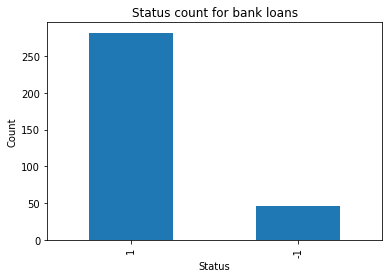

In [33]:
loan_dev['status'].value_counts().plot.bar()
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status count for bank loans')

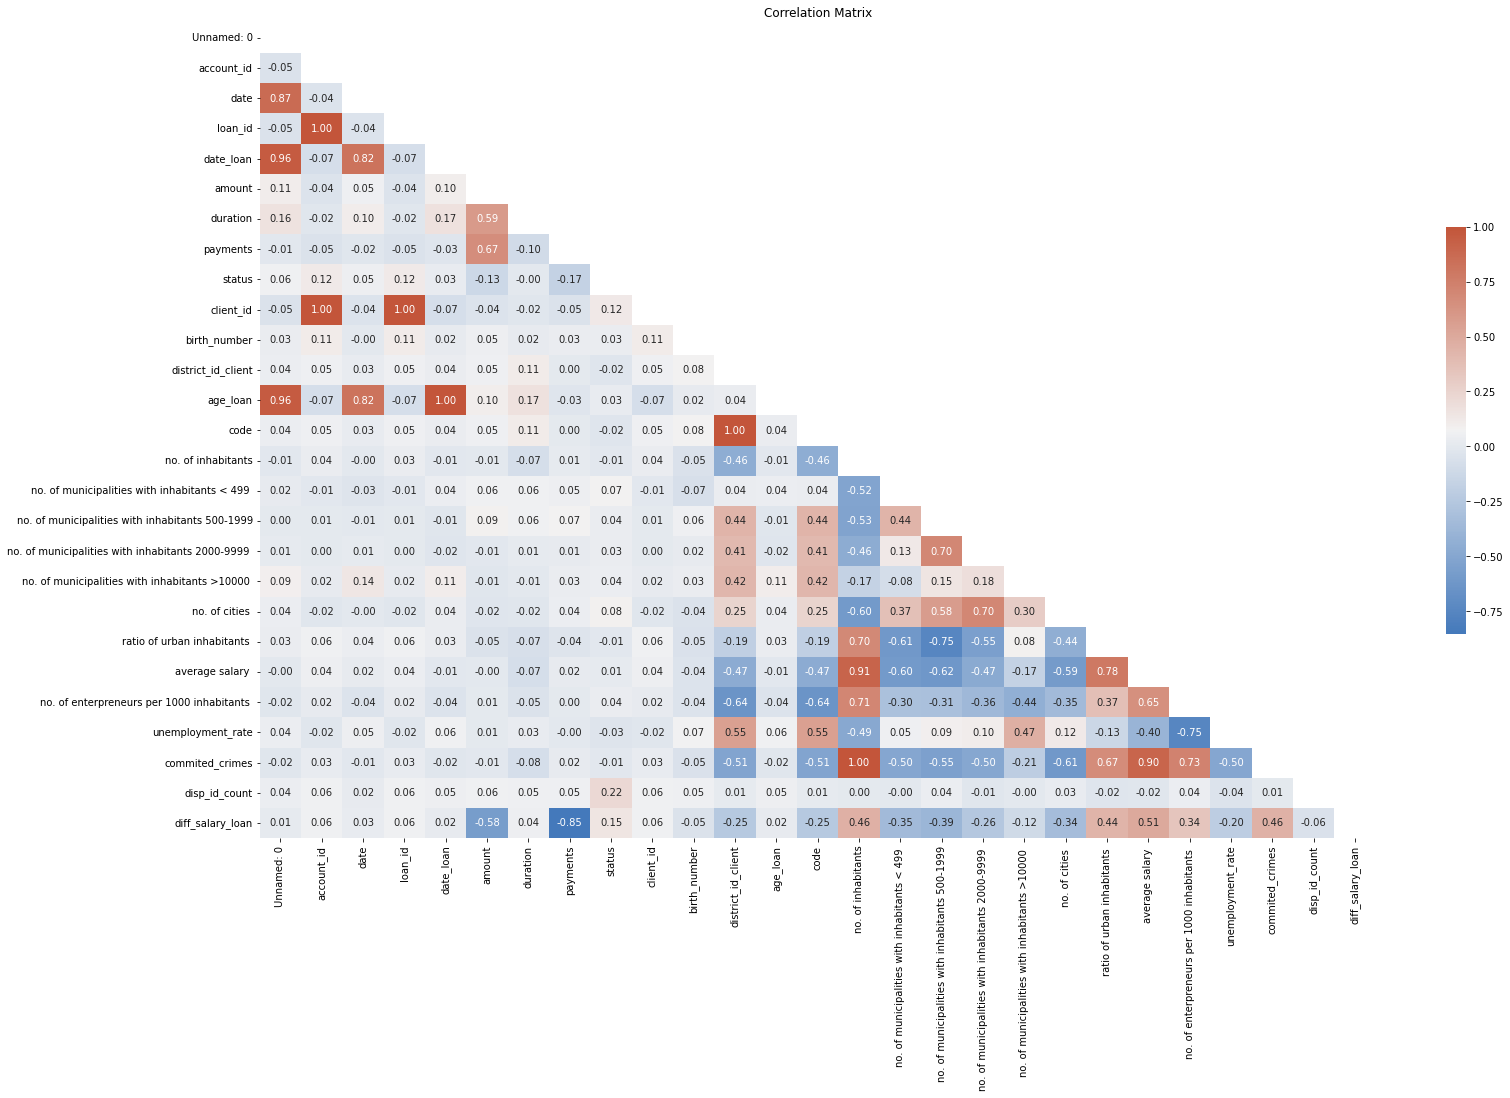

In [34]:
# correlation analysis

corr = df.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25,15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, 
    annot=True, 
    fmt='.2f',
    cbar_kws={'shrink': .5},
    mask=mask,
    cmap=colormap).set(title='Correlation Matrix')

plt.show()

##### **Demographic Data Distribution per Status**

/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_18119/3448608615.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


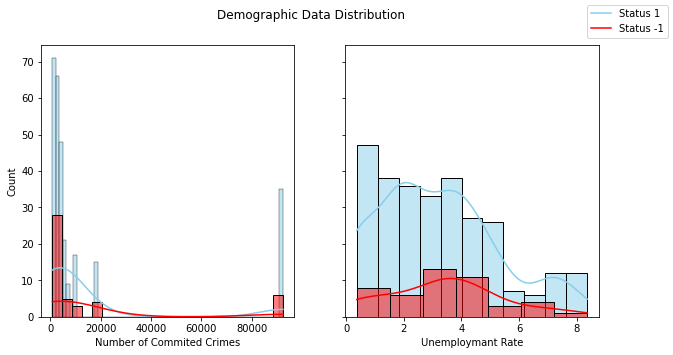

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# commited crimes
sns.histplot(data=df[df['status'] == 1], x='commited_crimes', color="skyblue", kde=True, ax=axs[0])
sns.histplot(data=df[df['status'] == -1], x='commited_crimes', color="red", kde=True, ax=axs[0])

# unemplyment rate
sns.histplot(data=df[df['status'] == 1], x='unemployment_rate', color="skyblue", kde=True, ax=axs[1])
sns.histplot(data=df[df['status'] == -1], x='unemployment_rate', color="red", kde=True, ax=axs[1])

axs[0].set_xlabel('Number of Commited Crimes')
axs[1].set_xlabel('Unemploymant Rate')

fig.suptitle('Demographic Data Distribution')
fig.legend(['Status 1', 'Status -1'])
fig.show()

##### **Number of Account Disponents - Statistics and Distribution per Status**

In [38]:
df.columns

Index(['Unnamed: 0', 'account_id', 'frequency', 'date', 'loan_id', 'date_loan',
       'amount', 'duration', 'payments', 'status', 'client_id', 'type',
       'birth_number', 'district_id_client', 'gender', 'age_loan', 'code',
       'name ', 'region', 'no. of inhabitants',
       'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'no. of enterpreneurs per 1000 inhabitants ', 'unemployment_rate',
       'commited_crimes', 'disp_id_count', 'diff_salary_loan'],
      dtype='object')

In [39]:
df['disp_id_count'].describe()

count    328.000000
mean       1.228659
std        0.420610
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: disp_id_count, dtype: float64

Text(0.5, 1.0, 'Status count by number of account disponents')

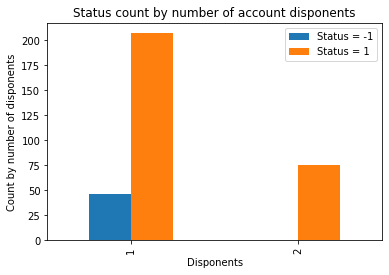

In [40]:
no_dups_df = df.drop_duplicates(subset=['account_id']) #remove duplicates
no_dups_df.groupby('disp_id_count')['status'].value_counts().unstack(1).plot.bar()

plt.xlabel('Disponents')
plt.ylabel('Count by number of disponents')
plt.legend(['Status = -1', 'Status = 1'])
plt.title('Status count by number of account disponents')

##### **Difference between the Average Salary and each Loan Installment - Statistics and Distribution per Status**

In [41]:
df['diff_salary_loan'] = df['average salary '] - df['payments']

In [42]:
df['diff_salary_loan'].describe()

count      328.000000
mean      5372.216463
std       2541.961044
min      -1177.000000
25%       3661.000000
50%       5465.000000
75%       6961.750000
max      12052.000000
Name: diff_salary_loan, dtype: float64

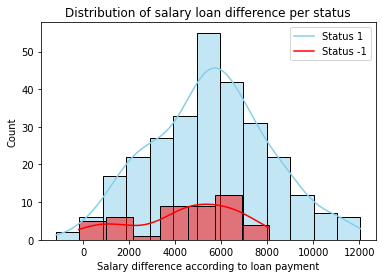

In [43]:
sns.histplot(data=df[df['status'] == 1], x='diff_salary_loan', color="skyblue", kde=True)
sns.histplot(data=df[df['status'] == -1], x='diff_salary_loan', color="red", kde=True)

plt.xlabel('Salary difference according to loan payment')
plt.legend(['Status 1', 'Status -1'])
plt.title('Distribution of salary loan difference per status')
plt.show()

##### **Analysis of the Gender Impact on the Loan Status**

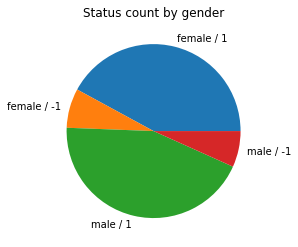

In [44]:
values = np.array(df.groupby('gender')['status'].value_counts())
labels = ['female / 1', 'female / -1', 'male / 1', 'male / -1']

plt.pie(values, labels=labels)
plt.title('Status count by gender')
plt.show()

##### **Statistics for Other Relevant Features and Outliers Detection**

In [46]:
count_transactions_per_type = df_transactions.groupby(['account_id', 'type']).size().unstack(fill_value=0)
count_transactions_per_type['debit'] = count_transactions_per_type['withdrawal'] + count_transactions_per_type['withdrawal in cash']
count_transactions_per_type.drop(labels=['withdrawal', 'withdrawal in cash'], axis=1, inplace=True)
count_transactions_per_type['credit_debit_ratio'] = count_transactions_per_type['credit'] / count_transactions_per_type['debit']

df_transactions = df_transactions.merge(count_transactions_per_type, on='account_id', how='left')
df_transactions.replace([np.inf, -np.inf], 0, inplace=True)
df_transactions.rename({ 
    'trans_id_count': 'transactions_count', 
    'credit': 'credits_count', 
    'debit': 'debits_count' }, 
    axis=1, inplace=True)


In [47]:
df_transactions.columns

Index(['Unnamed: 0', 'account_id', 'district_id', 'frequency', 'date',
       'loan_id', 'date_loan', 'amount', 'duration', 'payments', 'status',
       'trans_id_', 'date_transaction', 'type', 'operation',
       'amount_transaction', 'balance', 'k_symbol', 'bank', 'account',
       'transactions_count', 'credits_count', 'debits_count',
       'credit_debit_ratio_x', 'credits_count', 'debits_count',
       'credit_debit_ratio_y'],
      dtype='object')

<AxesSubplot:title={'center':'duration'}, xlabel='status'>

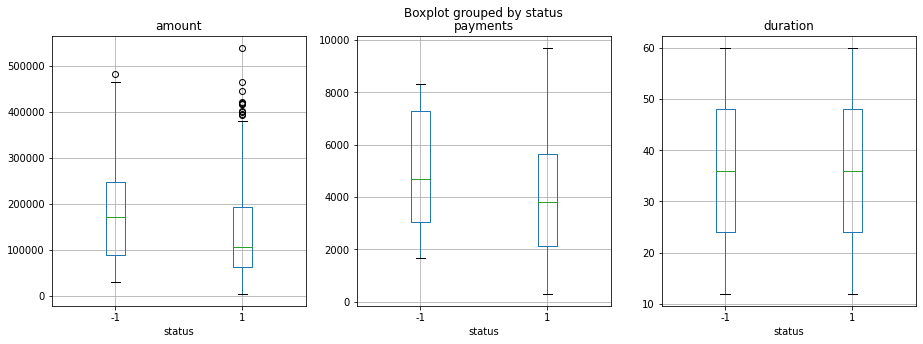

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

loan_dev.boxplot(column='amount', by='status', figsize=(5,5), ax=axs[0])
loan_dev.boxplot(column='payments', by='status', figsize=(5,5), ax=axs[1])
loan_dev.boxplot(column='duration', by='status', figsize=(5,5), ax=axs[2])

<AxesSubplot:title={'center':'diff_salary_loan'}, xlabel='status'>

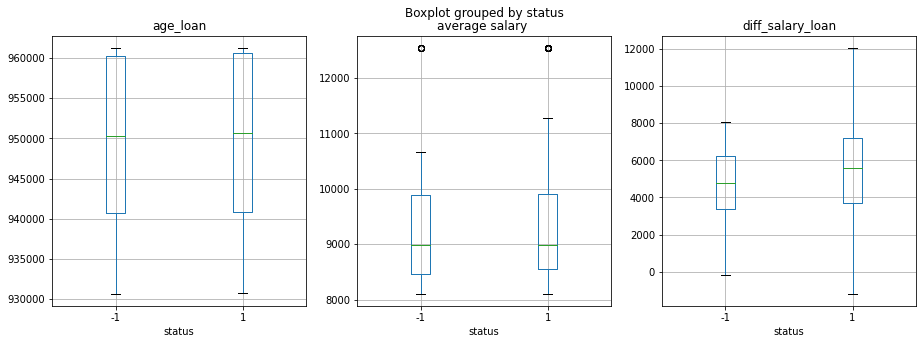

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

df.boxplot(column='age_loan', by='status', figsize=(5,5), ax=axs[0])
df.boxplot(column='average salary ', by='status', figsize=(5,5), ax=axs[1])
df.boxplot(column='diff_salary_loan', by='status', figsize=(5,5), ax=axs[2])

<AxesSubplot:title={'center':'credit_debit_ratio_y'}, xlabel='status'>

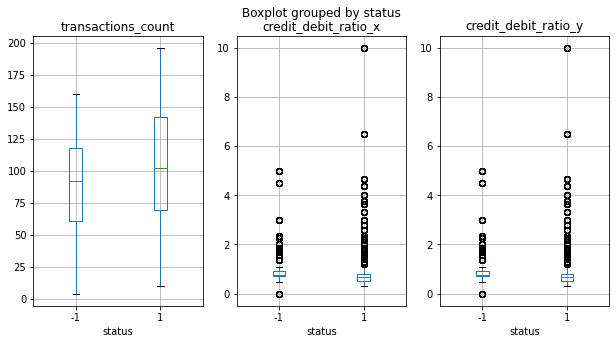

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

df_transactions.boxplot(column='transactions_count', by='status', figsize=(5,5), ax=axs[0])
df_transactions.boxplot(column='credit_debit_ratio_x', by='status', figsize=(5,5), ax=axs[1])
df_transactions.boxplot(column='credit_debit_ratio_y', by='status', figsize=(5,5), ax=axs[2])